## Esercizio Classificazione NLP4 - Financial

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/fina.png' width=800>


In [1]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/financial.csv

In [2]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/financial.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [5]:
## STEP1 DEFINIRE ED APPLICARE LA REGEX

patterns = {
            r'\s+': ' ',            # prima e dopo come ultima sostituisce tutti i multipli spazi con uno spazio
            r'[^\w\s]': '',         # remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',      # remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '             # sostituisce tutti i multipli spazi con uno spazio
            }


def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement,regex= True)
        df[column] = df[column].str.lower() # applica il lower
    return df



In [6]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, patterns):
        self.patterns = patterns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = pd.DataFrame(X, columns=['Sentence'])
        df = clean_column(df, 'Sentence', self.patterns)
        return df['Sentence'].values

In [7]:
text_cleaner = TextCleaner(patterns)

In [8]:
df['Sentence'] = text_cleaner.transform(df['Sentence'])

In [9]:
df

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi lows down 150 250 real possibility,negative
2,for the last quarter 2010 componenta net sa...,positive
3,according the finnishrussian chamber commerc...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used summer trainin...,neutral
5839,according shipping company viking line the d...,neutral
5840,the building and home improvement trade sale...,neutral


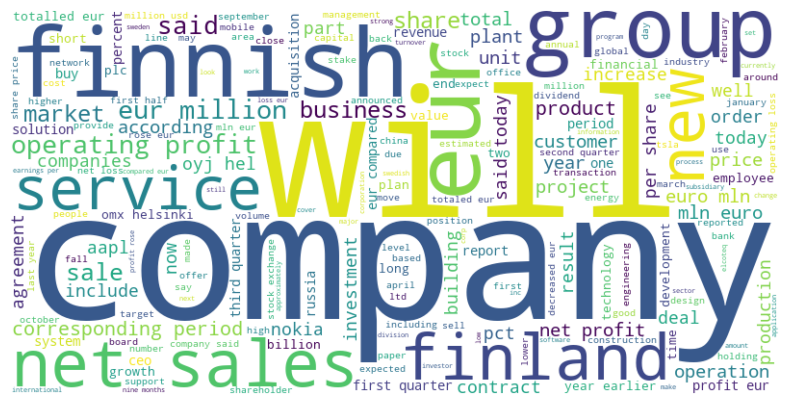

In [10]:
## STEP 2 : EDA con WORDCLOUD

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Sentence']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
##STEP 3: Definizre X e y (features testuali e Target)
X = df['Sentence']
y = df['Sentiment']


##STEP 4: Vettorizzazione - Bag of Words
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)


##STEP 5: TF-IDF
tfi = TfidfTransformer()
X_tfi = tfi.fit_transform(X_vectorized)

##STEP 6: Split Training and Test
X_train, X_test, y_train, y_test = train_test_split(X_tfi, y, test_size=0.2, random_state=42)


In [12]:






##STEP 7: Modellazione


# Modello 1: Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Risultati del modello Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(classification_report(y_test, y_pred_nb))

# Modello 2: Support Vector Machine (SVM)
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("\nRisultati del modello SVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))


# Modello 3: Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\nRisultati del modello Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr))

# Confronto dei modelli con cross-validation
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': LinearSVC(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

print("\nValutazione con Cross-Validation (5-fold):")
for name, model in models.items():
    cv_scores = cross_val_score(model, X_tfi, y, cv=5, scoring='accuracy')
    print(f"{name}: Accuracy media = {cv_scores.mean():.4f}, Deviazione standard = {cv_scores.std():.4f}")


# Selezioniamo il miglior modello
best_model = LogisticRegression(max_iter=1000, random_state=42)
best_model.fit(X_train, y_train)


Risultati del modello Naive Bayes:
Accuracy: 0.6570
              precision    recall  f1-score   support

    negative       0.89      0.05      0.09       175
     neutral       0.64      0.98      0.77       622
    positive       0.73      0.41      0.53       372

    accuracy                           0.66      1169
   macro avg       0.75      0.48      0.46      1169
weighted avg       0.71      0.66      0.59      1169


Risultati del modello SVM:
Accuracy: 0.6852
              precision    recall  f1-score   support

    negative       0.28      0.20      0.23       175
     neutral       0.71      0.81      0.75       622
    positive       0.79      0.71      0.75       372

    accuracy                           0.69      1169
   macro avg       0.59      0.57      0.58      1169
weighted avg       0.67      0.69      0.67      1169


Risultati del modello Logistic Regression:
Accuracy: 0.7092
              precision    recall  f1-score   support

    negative       0.44  

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
## Step 8: Pipeline Finale (nuovo train test split su dati raw testuali)

from sklearn.pipeline import Pipeline

pipeline_completa = Pipeline([
    ('text cleaner', text_cleaner),
    ('bow', CountVectorizer(max_features=5000, min_df=5, max_df=0.7)),
    ('tfidf', TfidfTransformer()),
    ('classificatore', LogisticRegression(max_iter=1000, random_state=42))
])



# Addestriamo la pipeline completa
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline_completa.fit(X_train, y_train)

# Step 9: Esportazione del modello

joblib.dump(pipeline_completa, 'pipeline_sentiment_completa.pkl')


['pipeline_sentiment_completa.pkl']